<h1 align=center><font size = 6>Telkom Assignment 1</font></h1>



<p><b>Prepared by</b> : Dyah Diwasasri Ratnaningtyas <br>
<b>Last Updated</b> : 22 January 2021 <br>
    <b>Description</b> : This project considered as Telkom Assignment 1 of Hacktiv8 Introduction to Python for Data Science Batch 47. The aim of this project is to introduce the data visualization with Python as concrete and as consistent as possible. The dataset that will be used is Training Feedback Data 2020 from Telkom Data Bay. The result of this project is for training purpose only.</p>

# 1. Data Preprocessing

In this section, the dataset that will be working on later must be preprocess first.

In [376]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import folium
from wordcloud import WordCloud, STOPWORDS
mpl.style.use(['ggplot'])

%matplotlib inline

In [377]:
#Fetching CSV data from dataset folder
training = pd.read_csv('./dataset/Feedback_Lat_2020.csv')

In [378]:
#View the top 5 rows of the dataset using the head() function
training.head(5)

,Nama Pelatihan,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,...,UBPP Akom,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score
0,Social Media Ads & Analytic,80114181,LAT,NaN,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CISM,80114269,LAT,Virtual Classroom,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Public,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Programmer Development Course Amoeba,80114271,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Business Analytics Amoeba,80114280,LAT,Video Learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Online UX Design Course Amoeba,80114281,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [379]:
#Displaying data types for getting basic information about this dataframe
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Nama Pelatihan                     1581 non-null   object 
 1   Objid Pelatihan                    1581 non-null   int64  
 2   Category                           1581 non-null   object 
 3   Tipe                               895 non-null    object 
 4   Lokasi Pelatihan                   1447 non-null   object 
 5   Provider                           1480 non-null   object 
 6   Academy Event                      1459 non-null   object 
 7   Location                           1514 non-null   object 
 8   Provider Category                  1239 non-null   object 
 9   Event Type                         1526 non-null   object 
 10  Status                             1519 non-null   object 
 11  Tgl Mulai                          1581 non-null   objec

In [380]:
#Showing basics statistic of data
training.describe()

,Objid Pelatihan,JML Peserta,JML Confirmed,JML Peserta Hadir,JML UBPP Inst,JML UBPP Delivery,UBPP Inst,UBPP Akom,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score
count,1.581000e+03,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1539.000000,1581.000000,1581.000000,1581.0,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,8.279691e+07,32.163188,18.940544,23.476913,9.270715,12.886148,41.624997,27.296420,51.224092,0.0,52.388545,27.168355,52.532796,39.369564,50.628419,52.671012,52.279791
std,4.399535e+06,94.044293,64.475255,61.810226,20.698898,28.014751,41.650135,38.448665,43.125272,0.0,43.819904,38.381787,43.979533,40.709386,42.685038,44.111036,43.769020
min,8.011078e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000
25%,8.011266e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.011346e+07,9.000000,3.000000,5.000000,1.000000,2.000000,61.670000,0.000000,80.000000,0.0,83.330000,0.000000,83.630000,42.860000,77.780000,83.750000,83.250000
75%,9.000375e+07,29.000000,21.000000,25.000000,13.000000,16.000000,82.915000,71.980000,89.090000,0.0,90.000000,70.710000,90.100000,75.000000,88.330000,90.000000,90.000000
max,9.000456e+07,1576.000000,1209.000000,790.000000,336.000000,343.000000,100.000000,100.000000,100.000000,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [381]:
#Copy data
training_data = training.copy()

In [382]:
#Drop column that will not be used in this project
training_data.drop(['Tipe','Provider Category'], inplace=True, axis=1)

In [383]:
#Manipulating columns by renaming column name
training_data = training_data.rename(
    columns={"Nama Pelatihan" : "training_name", 
             "Objid Pelatihan" : "objid",
             "Category" : "category",
             "Lokasi Pelatihan" : "city",
             "Provider" : "provider",
             "Academy Event" : "academy",
             "Location" : "location",
             "Event Type" : "training_type",
             "Status" : "status",
             "Tgl Mulai" : "start_date",
             "Tgl Selesai" : "end_date",
             "JML Peserta" : "total_participant",
             "JML Confirmed" : "total_confirmed",
             "JML Peserta Hadir" : "total_attendance",
             "JML UBPP Inst" : "total_feed_instructor",
             "JML UBPP Delivery" : "total_feed_delivery",
             "UBPP Inst" : "feed_instructor",
             "UBPP Akom" : "feed_acomodation",
             "UBPP Sarana" : "feed_facility",
             "UBPP Laborat" : "feed_lab",
             "UBPP Penyelenggaraan" : "feed_delivery",
             "UBPP Kafetaria" : "feed_cafe",
             "UBPP Materi" : "feed_material",
             "Net Promotor Score" : "nps",
             "Customer Satisfaction" : "cs",
             "First Response & Average Handling" : "frah",
             "Customer Effort Score" : "ces"           
             }
)

In [384]:
#Set academy as index then displaying data types
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   training_name          1581 non-null   object 
 1   objid                  1581 non-null   int64  
 2   category               1581 non-null   object 
 3   city                   1447 non-null   object 
 4   provider               1480 non-null   object 
 5   academy                1459 non-null   object 
 6   location               1514 non-null   object 
 7   training_type          1526 non-null   object 
 8   status                 1519 non-null   object 
 9   start_date             1581 non-null   object 
 10  end_date               1581 non-null   object 
 11  total_participant      1581 non-null   int64  
 12  total_confirmed        1581 non-null   int64  
 13  total_attendance       1581 non-null   int64  
 14  total_feed_instructor  1581 non-null   int64  
 15  tota

In [385]:
#Fill missing value in column feed_instructor with data mean
training_data['feed_instructor'].fillna((training_data['feed_instructor'].mean()), inplace=True)
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   training_name          1581 non-null   object 
 1   objid                  1581 non-null   int64  
 2   category               1581 non-null   object 
 3   city                   1447 non-null   object 
 4   provider               1480 non-null   object 
 5   academy                1459 non-null   object 
 6   location               1514 non-null   object 
 7   training_type          1526 non-null   object 
 8   status                 1519 non-null   object 
 9   start_date             1581 non-null   object 
 10  end_date               1581 non-null   object 
 11  total_participant      1581 non-null   int64  
 12  total_confirmed        1581 non-null   int64  
 13  total_attendance       1581 non-null   int64  
 14  total_feed_instructor  1581 non-null   int64  
 15  tota

In [386]:
#Remove missing values
training_data = training_data.dropna()
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1569
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   training_name          1395 non-null   object 
 1   objid                  1395 non-null   int64  
 2   category               1395 non-null   object 
 3   city                   1395 non-null   object 
 4   provider               1395 non-null   object 
 5   academy                1395 non-null   object 
 6   location               1395 non-null   object 
 7   training_type          1395 non-null   object 
 8   status                 1395 non-null   object 
 9   start_date             1395 non-null   object 
 10  end_date               1395 non-null   object 
 11  total_participant      1395 non-null   int64  
 12  total_confirmed        1395 non-null   int64  
 13  total_attendance       1395 non-null   int64  
 14  total_feed_instructor  1395 non-null   int64  
 15  tota

In [387]:
#Specifying data types
training_data['start_date'] = pd.to_datetime(training_data['start_date'])
training_data['end_date'] = pd.to_datetime(training_data['end_date'])
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1569
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   training_name          1395 non-null   object        
 1   objid                  1395 non-null   int64         
 2   category               1395 non-null   object        
 3   city                   1395 non-null   object        
 4   provider               1395 non-null   object        
 5   academy                1395 non-null   object        
 6   location               1395 non-null   object        
 7   training_type          1395 non-null   object        
 8   status                 1395 non-null   object        
 9   start_date             1395 non-null   datetime64[ns]
 10  end_date               1395 non-null   datetime64[ns]
 11  total_participant      1395 non-null   int64         
 12  total_confirmed        1395 non-null   int64         
 13  tot

In [388]:
training_data.isnull().sum()

training_name            0
objid                    0
category                 0
city                     0
provider                 0
academy                  0
location                 0
training_type            0
status                   0
start_date               0
end_date                 0
total_participant        0
total_confirmed          0
total_attendance         0
total_feed_instructor    0
total_feed_delivery      0
feed_instructor          0
feed_acomodation         0
feed_facility            0
feed_lab                 0
feed_delivery            0
feed_cafe                0
feed_material            0
nps                      0
cs                       0
frah                     0
ces                      0
dtype: int64

# 2. Data Visualization

In this section, data that has been preprocess before would be visualize in several  type of visualization.

## 2.1 Area Plot

**Question:** How is the monthly trend of Net Promotor Score (NPS) for training conduct by each academy in 2020?

In [389]:
#change date time of start date then add month' column for each data
training_data['start_date'] = pd.to_datetime(training_data['start_date'])
training_data['month'] = pd.DatetimeIndex(training_data['start_date']).month
training_data.head()

,training_name,objid,category,city,provider,academy,location,training_type,status,start_date,...,feed_facility,feed_lab,feed_delivery,feed_cafe,feed_material,nps,cs,frah,ces,month
0,Social Media Ads & Analytic,80114181,LAT,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,On Going,2020-12-16,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
1,CISM,80114269,LAT,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),Public,On Going,2020-12-16,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
2,Programmer Development Course Amoeba,80114271,LAT,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,WO,2020-12-16,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
3,Business Analytics Amoeba,80114280,LAT,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,WO,2020-12-16,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
4,Online UX Design Course Amoeba,80114281,LAT,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,WO,2020-12-16,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12


In [390]:
#create pivot table of month, academy, and nps score
nps_trend = training_data.pivot_table(index = 'month', columns='academy', values='nps')
nps_trend

academy,BUSINNESS ENABLER,CONSUMER,DSP,ENTERPRISE,GOFM,KMCS,LEADERSHIP,MOBILE,NITS,"PNC,LO, dan GS",WS & INTERNATIONAL
month,,,,,,,,,,,
1,20.964118,23.489500,80.792308,17.162143,NaN,0.000,48.200000,NaN,62.366000,NaN,14.285714
2,18.953929,29.475200,77.867826,20.648333,NaN,NaN,52.802727,NaN,66.016429,0.0,46.392222
3,43.846316,39.881818,60.728333,63.730000,NaN,NaN,26.085455,0.0,73.451667,NaN,0.000000
4,20.912000,45.440000,80.769231,47.064500,NaN,NaN,0.000000,NaN,13.667000,NaN,11.458333
5,44.852083,50.475000,36.672917,48.000769,NaN,NaN,29.397500,NaN,62.899000,0.0,47.774000
6,47.355278,19.661538,56.358611,29.095000,NaN,0.000,30.911250,NaN,59.528000,NaN,28.701765
7,42.010909,55.106800,61.723871,56.112500,0.0,NaN,18.648750,NaN,59.167273,NaN,46.297692
8,51.834286,49.132564,46.264138,52.283846,NaN,NaN,45.951667,NaN,39.777500,NaN,22.788000
9,48.294878,41.108718,47.460938,64.120500,NaN,NaN,33.930000,NaN,57.680417,NaN,46.896923


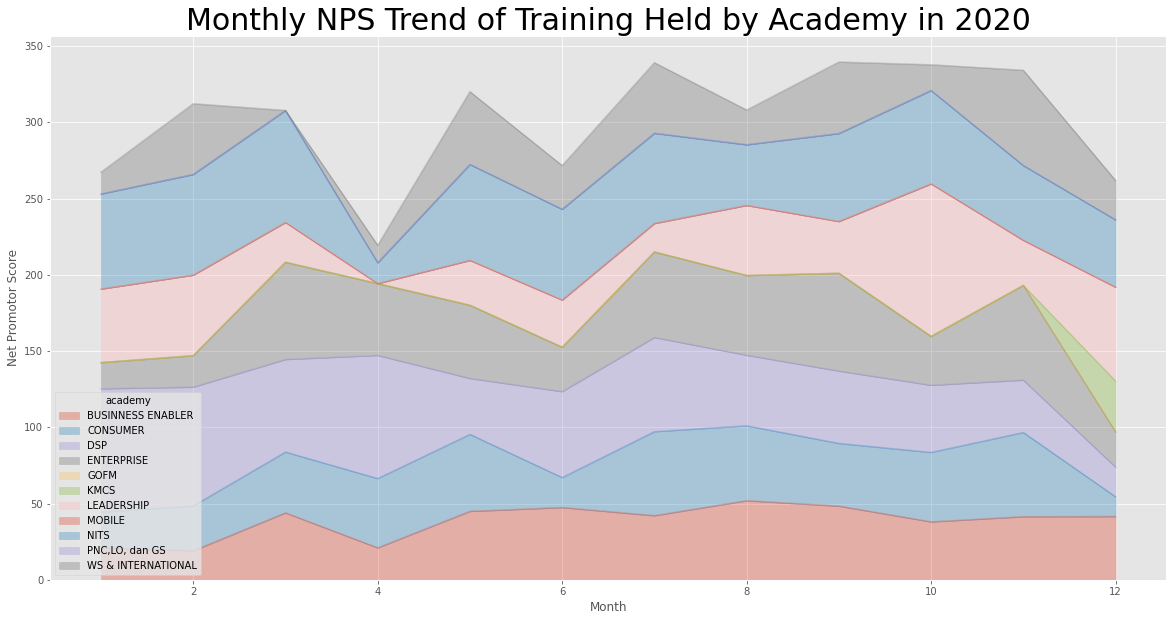

In [391]:
#create area plot of nps trend
nps_trend.plot(kind='area',
               alpha=0.35,
               stacked=True,
               figsize=(20,10),
            )
plt.title('Monthly NPS Trend of Training Held by Academy in 2020', size=30) #add title
plt.ylabel('Net Promotor Score') #add y-label
plt.xlabel('Month') #add x-label
plt.show()

**Inisight:**

Based on the visualization above, almost all of the training held by academy has the lowest trend of Net Promotor Score (NPS) on April 2020. The declining movement of the NPS trend might be as the result of the transition of switching training delivery method from offline to online due to COVID-19 pandemic that occurs on early 2020.

## 2.2 Histogram

**Question:**
What is the frequency distribution of the Customer Satisfaction of all training in 2020?

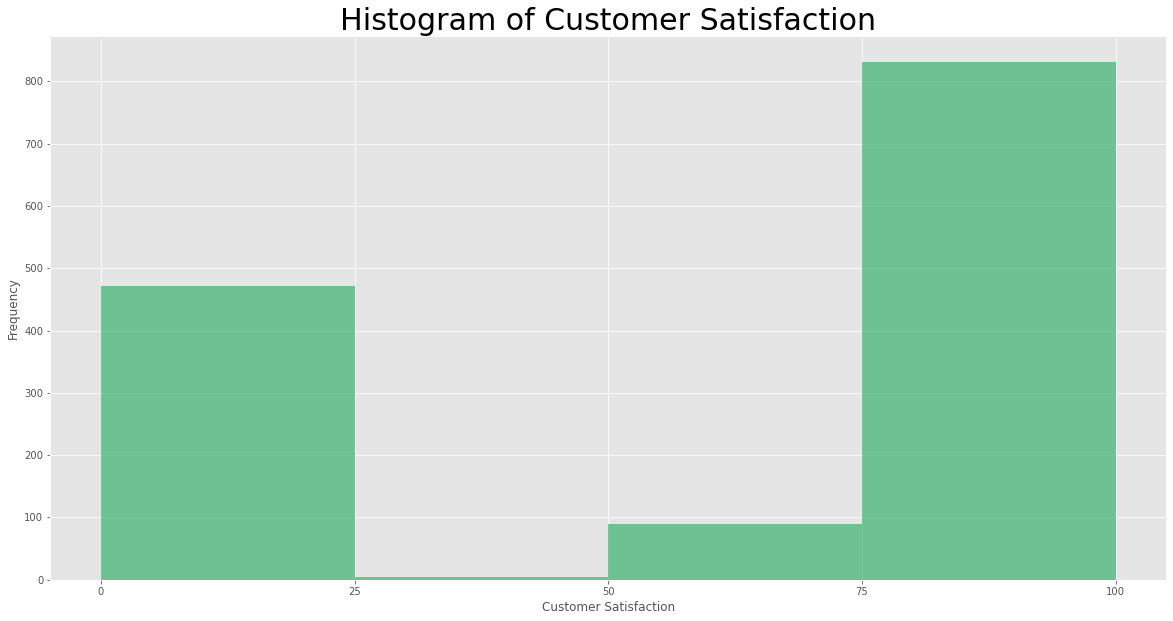

In [392]:
#define list of bin intervals
count, bin_edges = np.histogram(training_data['cs'],4)

#generate histogram of Customer Satifaction frequency
cs = training_data['cs'].plot(kind='hist',
                              figsize=(20, 10),
                              bins=4,
                              alpha=0.7,
                              xticks=bin_edges,
                              color=['mediumseagreen']
                             )
                                             
cs.set_title('Histogram of Customer Satisfaction', size=30) #add title
cs.set_xlabel('Customer Satisfaction') #add x-label
plt.show()

**Inisight:**

Based on the visualization above, even though the high result of Customer Satisfaction with the range of 75-100 is most likely to occur, Telkom must need to pay attention to improve their training service in order to boost their customer satisfaction. It is because the low result of Customer Satisfaction (0-25) is still often to seen.

## 2.3 Bar Chart

**Question:**
What is the top 15 training with the most participant in 2020?

In [393]:
#sorting descending value of training total participant
training_data.sort_values(by='total_participant',ascending=False, inplace=True)

#creating dataframe of top 15 training with the most participant
training_participant = training_data[['training_name','total_participant']]
training_participant_top15 = training_participant.head(15)
training_participant_top15

,training_name,total_participant
335,Living the Grand Why Batch 5,1576
136,Living the Grand Why Batch 7,1432
403,Living the Grand Why Batch 1,1060
324,Living the Grand Why Batch 6,1050
351,Living the Grand Why Batch 4,1046
394,Living the Grand Why Batch 2,985
377,Living the Grand Why Batch 3,972
665,Sales Force TR-2 Batch-1,631
638,Sales Force TR-2 Batch-2,559
25,Unlocking Success Digital Transform B2,451


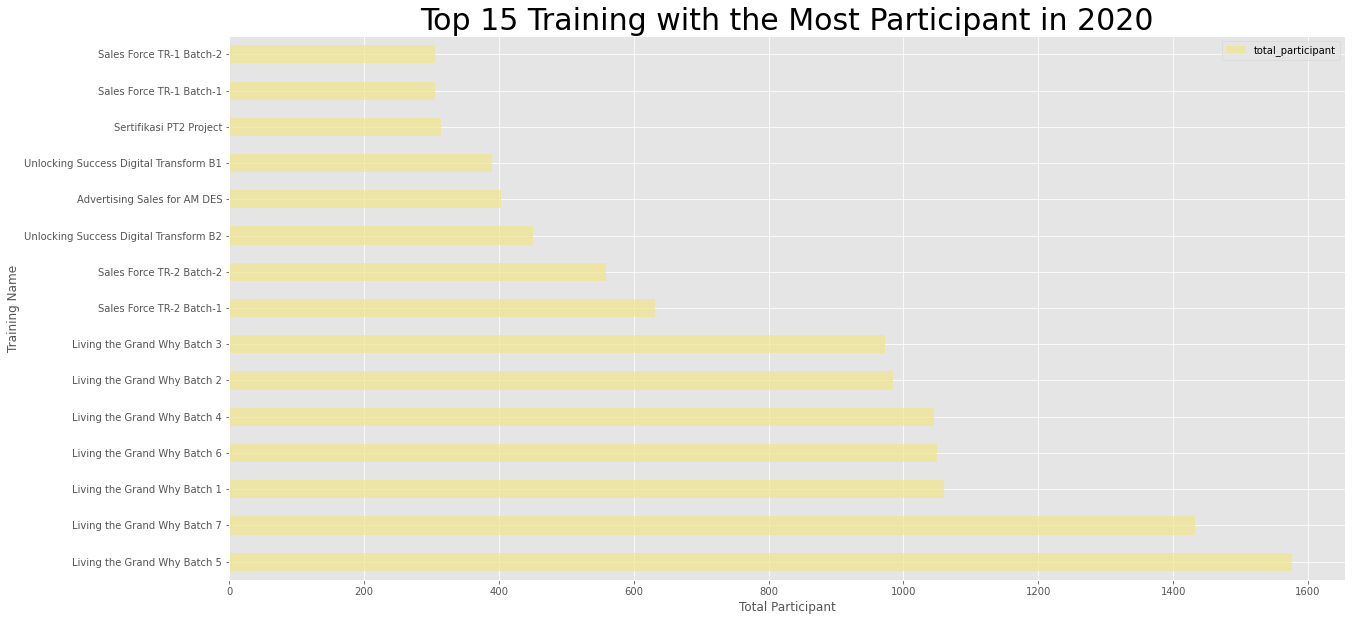

In [394]:
#generate bar chart of Top 15 training with the most participant
top15 = training_participant_top15.plot(x='training_name',
                         kind='barh',
                         alpha=0.7,
                         color='khaki',
                         figsize=(20, 10))

top15.set_title('Top 15 Training with the Most Participant in 2020', size=30) #add title
top15.set_ylabel('Training Name') #add y-label
top15.set_xlabel('Total Participant') #add-x-label

plt.show()

**Inisight:**

Based on the visualization above, the training series of **Living the Grand Why** has the most participant among another training in 2020. This is because the training of Living the Grand Why has been considered as mandatory training for all Telkom Group in 2020

## 2.4 Pie Chart

**Question:**
What is the percentage of total training held by Academy in 2020?

In [395]:
#group training by academy and apply count() function based on objid
training_academy = training_data.groupby('academy',axis=0)['objid'].count()
training_academy

academy
BUSINNESS ENABLER     299
CONSUMER              250
DSP                   310
ENTERPRISE            151
GOFM                    3
KMCS                    4
LEADERSHIP             74
MOBILE                  1
NITS                  169
PNC,LO, dan GS          2
WS & INTERNATIONAL    132
Name: objid, dtype: int64

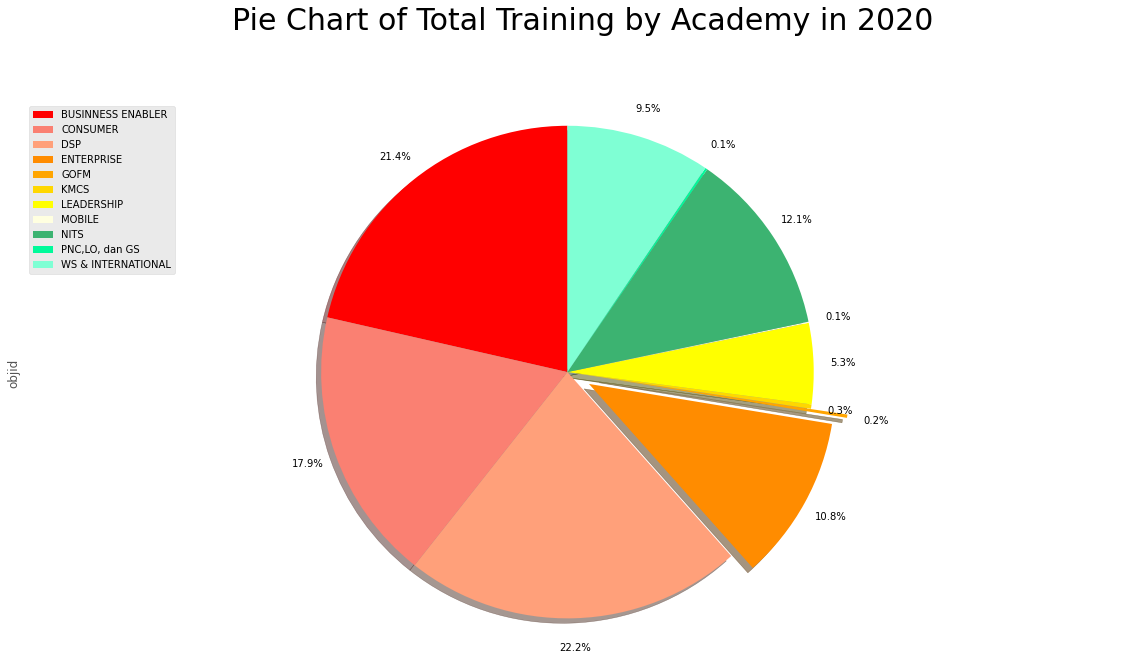

In [396]:
#plotting the data into pie chart

colors_list = ['red','salmon','lightsalmon','darkorange','orange','gold','yellow','lightyellow','mediumseagreen','mediumspringgreen','aquamarine']
explode_list =[0,0,0,0.1,0.15,0,0,0,0,0,0] 

total_training = training_academy.plot(kind='pie',
                      figsize=(20, 10),
                      autopct='%1.1f%%', 
                      startangle=90,    
                      shadow=True,       
                      labels=None, #turn off labels on pie chart
                      pctdistance=1.12, #the ratio between center of each pie slice
                      colors=colors_list,
                      explode=explode_list
                      )

total_training.set_title('Pie Chart of Total Training by Academy in 2020', y=1.12, size=30) 

total_training.axis('equal') #sets the pie char to look like a circle

total_training.legend(labels=training_academy.index, loc='upper left') 

plt.show()

**Inisight:**

Based on the visualization above, the total training held by Academy is dominating by DSP Academy (22.2%), follows by Business Enabler Academy (21.4%) and Consumer Academy (17.9%). In contrary, Mobile Academy has the least training to be delivered in 2020 (0.1%).

## 2.5 Box Plot

**Question:**
How is the representation of all feedback training distribution in 2020?

In [397]:
#create dataframe of all feedback training
feedback = training_data[['feed_instructor','feed_acomodation','feed_facility','feed_lab','feed_delivery','feed_cafe','feed_material']]
feedback

,feed_instructor,feed_acomodation,feed_facility,feed_lab,feed_delivery,feed_cafe,feed_material
335,78.010000,0.0,90.57,0,89.76,0.0,90.57
136,41.624997,0.0,91.06,0,90.79,0.0,90.88
403,76.590000,0.0,87.74,0,87.92,0.0,89.03
324,77.820000,0.0,89.92,0,90.35,0.0,90.79
351,77.280000,0.0,91.22,0,91.65,0.0,92.31
...,...,...,...,...,...,...,...
359,0.000000,0.0,0.00,0,0.00,0.0,0.00
358,0.000000,0.0,0.00,0,0.00,0.0,0.00
357,0.000000,0.0,0.00,0,0.00,0.0,0.00
348,0.000000,0.0,0.00,0,0.00,0.0,0.00


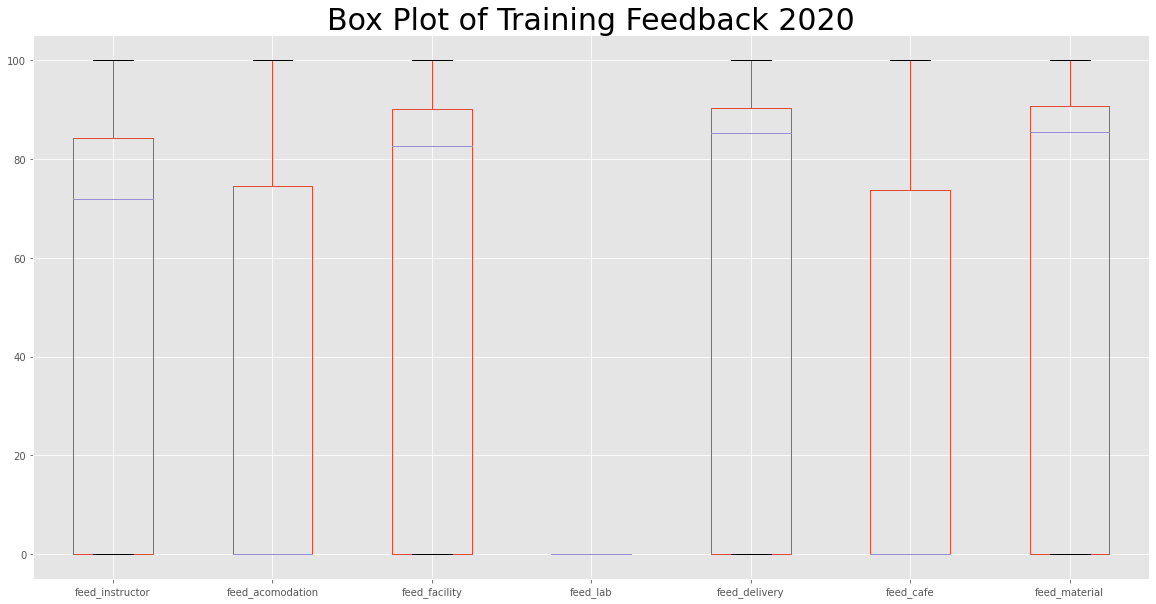

In [398]:
#generating data into box plot
feed = feedback.plot(kind='box',
                           figsize=(20, 10),
                           showfliers=False)

feed.set_title('Box Plot of Training Feedback 2020', size=30) 

plt.show()

**Inisight:**

Based on the visualization above, feedback result of instructor, facility, delivery, and material has almost the same type of distribution. The maximum number of feedback rate is 100. The feedback about laboratorium is empty because in 2020 there was no laboratorium usage. 

## 2.6 Scatter Plot

**Question:**
How is the trend of customer effort score in 2020?

In [399]:
#create pivot table of month and ces
ces_trend = training_data.pivot_table(index = 'month',values='ces')
ces_trend.reset_index(inplace=True)
ces_trend

,month,ces
0,1,41.596889
1,2,51.429837
2,3,53.688904
3,4,50.687097
4,5,60.160444
5,6,61.114654
6,7,65.365360
7,8,67.449185
8,9,69.127135
9,10,61.245772


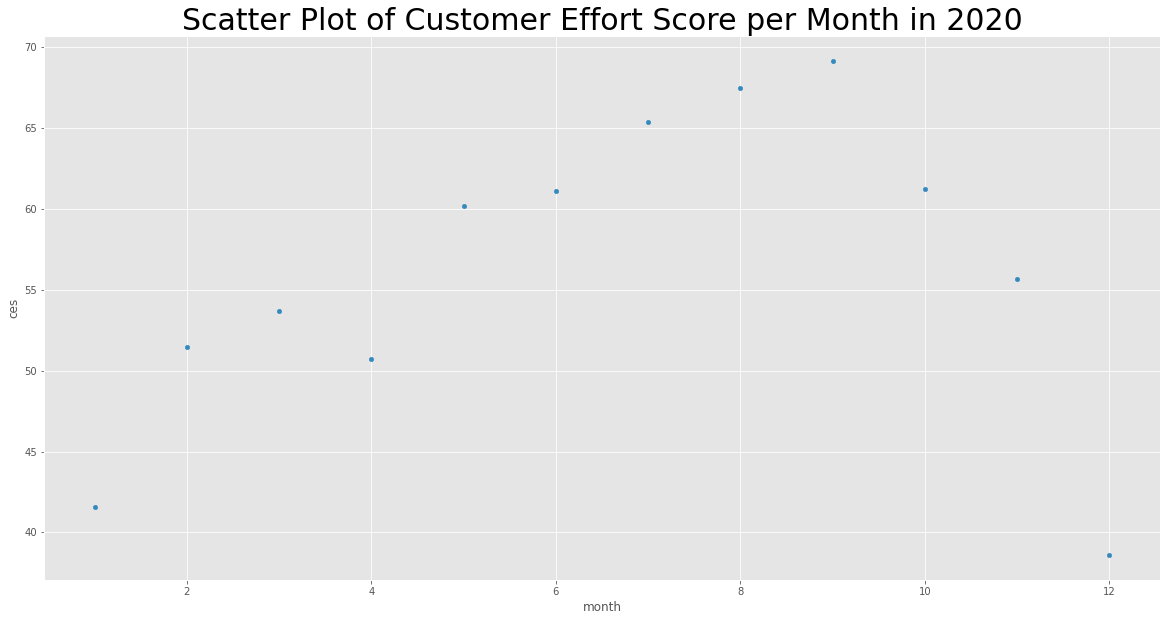

In [400]:
#generate scatter plot based on data
ces_plot = ces_trend.plot(kind='scatter',
                       x='month',
                       y='ces',
                       figsize=(20, 10))

ces_plot.set_title('Scatter Plot of Customer Effort Score per Month in 2020', size=30)
plt.show()

**Inisight:**

Based on the visualization above, the trend of Customer Effort Score (CES) is still sometimes up and down. Due to the implementation of full online training starting from April 2020, the trend of CES is slowly getting up. The highest CES achieved in September 2020, But, starting from November 2020 the there's declining in CES trends

## 2.7 Word Clouds

**Question:**
What is the key words of training name held in 2020?

In [401]:
#stopwords set up
stopwords = set(STOPWORDS)

In [402]:
#open file and read it into a variable name keyword
fields=['Nama Pelatihan']
keyword=pd.read_csv('./dataset/Feedback_Lat_2020.csv',usecols=fields)

In [403]:
#instantiate a word cloud object and generate the word cloud (limit to 2000 words)
keyword2 = ''.join(keyword['Nama Pelatihan'])
keyword_training = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
).generate(keyword2)

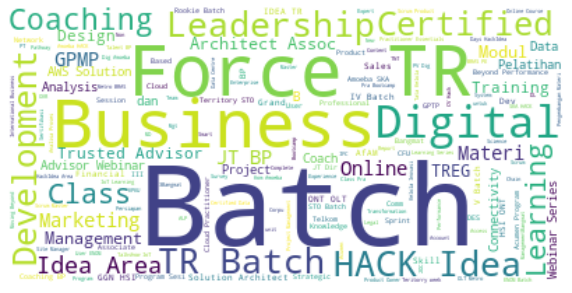

In [408]:
#adding the word 'batch' to stopwords then display the word cloud
stopwords.add('Batch')

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(12)

plt.imshow(keyword_training,interpolation='bilinear')
plt.axis('off')
plt.show()

**Inisight:**

Based on the visualization above, the keyword of training name in 2020 are Digital, Force, Business, and TR.

## 2.8 Folium Maps 

**Question:**
Where is the location of most training was held in 2020?

In [405]:
#find the location of most training was held
training_loc = training_data.groupby('city',axis=0)['objid'].count()
training_loc

city
BANDUNG               7
Bali                  1
Balikpapan            2
Bandung             899
Bogor                 2
JAKARTA               2
Jakarta             224
Jakarta Selatan       3
Kabupaten Badung      1
Makassar            122
Malang                1
Mataram               1
Medan                36
Palembang             1
Pekanbaru             1
Semarang             42
Surabaya             46
Yogyakarta            4
Name: objid, dtype: int64

In [406]:
#locate the location on map

loc = 'Bandung'
title_map = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 

training_map = folium.Map(location=[-6.9175,107.6191], zoom_start=15)
folium.Marker([-6.9175,107.6191], popup='Bandung').add_to(training_map)
training_map.get_root().html.add_child(folium.Element(title_map))

training_map

**Inisight:**

Based on the visualization above, Bandung is the location of the most training held in 2020 as shown in the maps.

# 3. Overall Analysis

1. In  early 2020, COVID-19 pandemic era has affected Telkom training delivery as shown in the lowest point of NPS result on April 2020 as shown in figure 2.1 as Telkom were switching their training delivery from offline to full online.
2. Even though the NPS is dropped, all of Academy in Telkom continue to deliver the training (figure 2.3 & 2.4). Almost all of the training conduct online, so that the city is default set in Bandung (figure 2.8)
3. The influental topic of training was about Digital Business as shown in figure 2.7 
4. Due to the training delivery transition, Telkom still managed to get good impression from its customer as shown in figure 2.2, 2.5 & 2.6 